<a href="https://colab.research.google.com/github/Abdul-Rahman258/ML_Practice/blob/main/ML_Project_FIFA_19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# prompt: load the libs for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the plotting style
plt.style.use('ggplot')
# set context for larger fonts and axes labels
sns.set_context("talk")


In [19]:
# prompt: load the fifa_eda.csv file into the ide

df = pd.read_csv('fifa_eda.csv')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [2]:
# prompt: perform data preprocessing onto this file and add missing and and remove any duplicates and understand the data and give me the key points out of it data patterns and stuff how things relate and everything

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the plotting style
plt.style.use('ggplot')
# set context for larger fonts and axes labels
sns.set_context("talk")

df = pd.read_csv('fifa_eda.csv')

# Data Cleaning and Preprocessing

# Handling Missing Values
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)  # Fill numeric columns with mean
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical columns with mode

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Data Understanding and Exploration

# Key Points, Data Patterns, and Relationships
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe())

# Identify Numerical and Categorical Columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns



Data Shape: (18207, 18)

Data Types:
 ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

Descriptive Statistics:
                   ID           Age       Overall     Potential          Value  \
count   18207.000000  18207.000000  18207.000000  18207.000000   18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299    2444.530214   
std     29965.244204      4.669

<ipython-input-2-42fce2064ebb>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical columns with mode
<ipython-input-2-42fce2064ebb>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

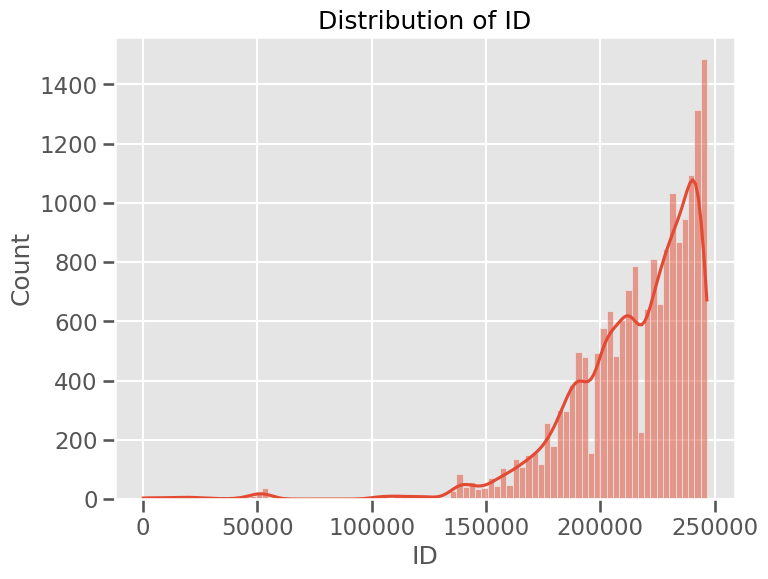

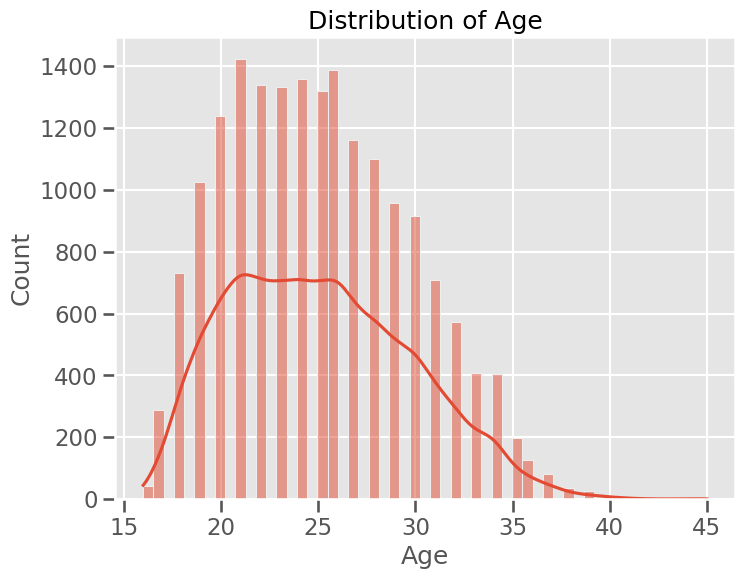

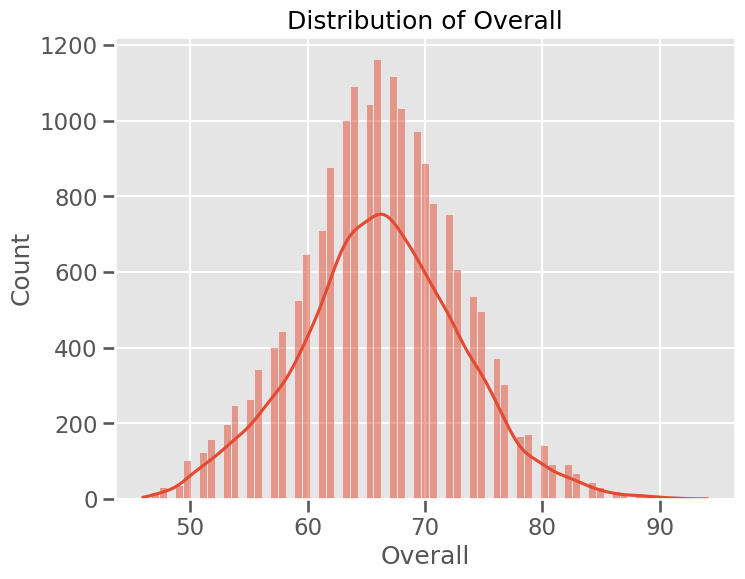

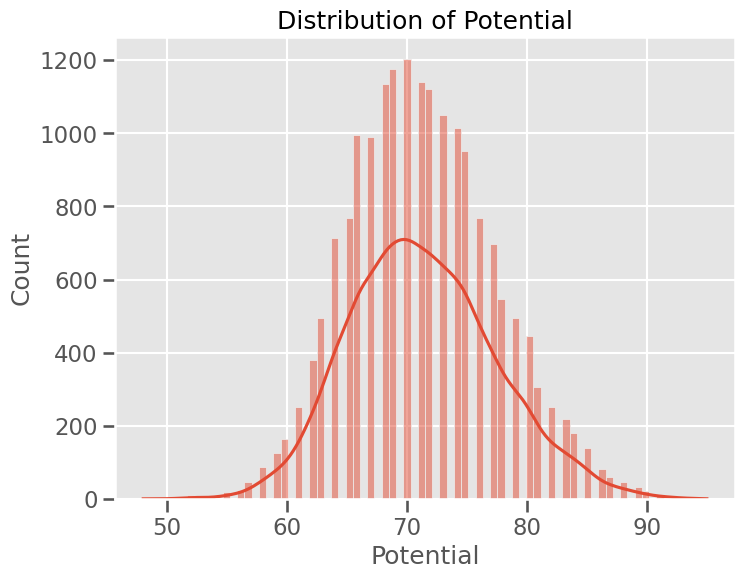

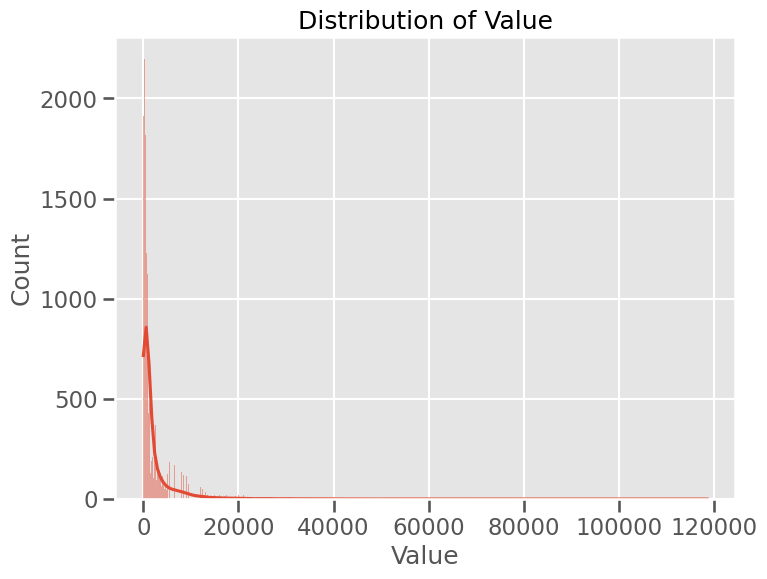

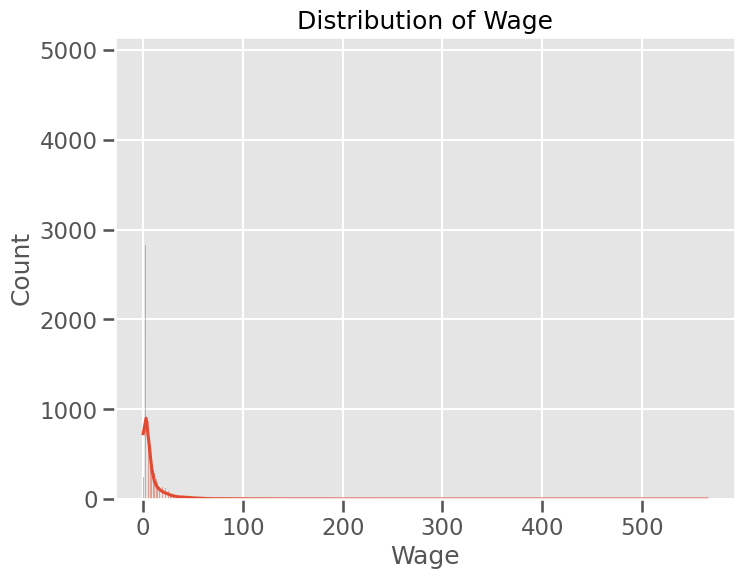

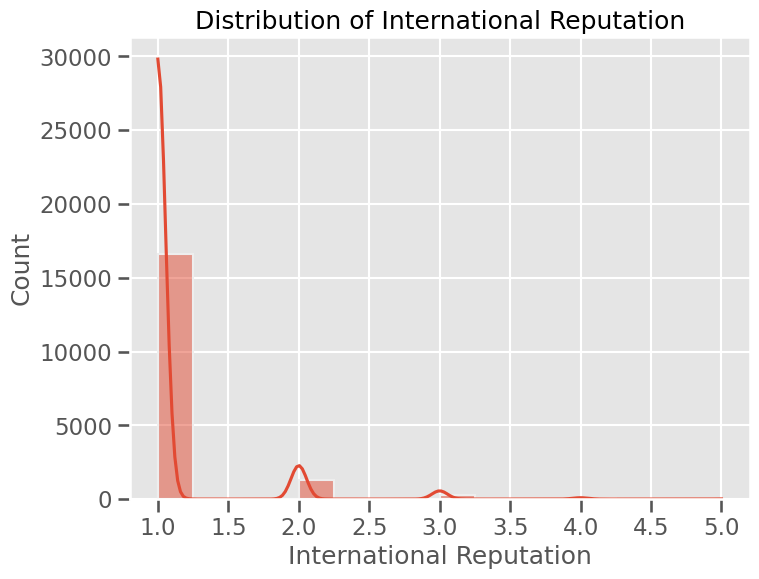

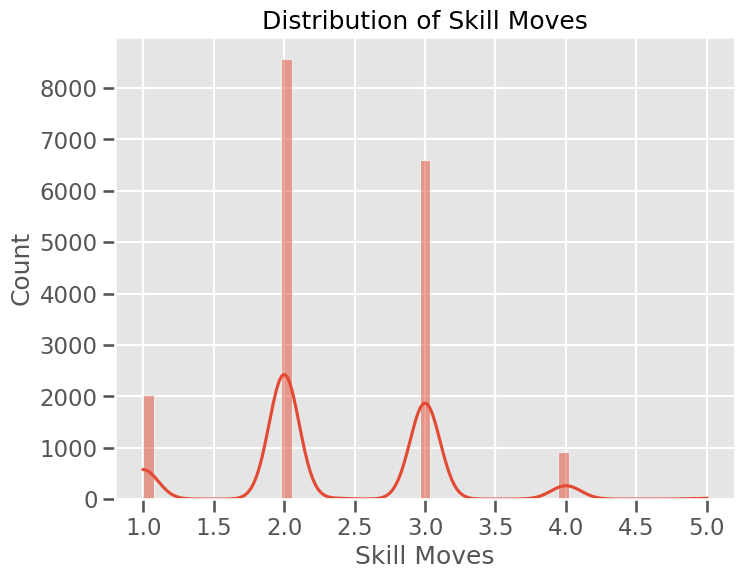

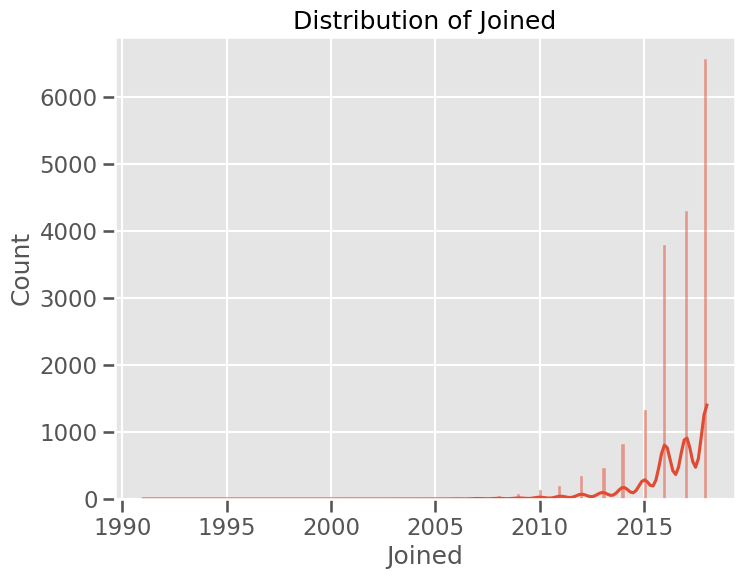

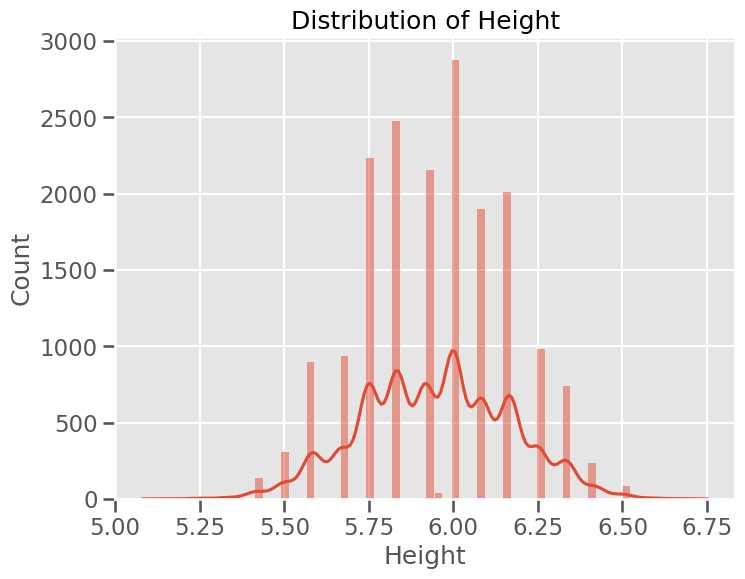

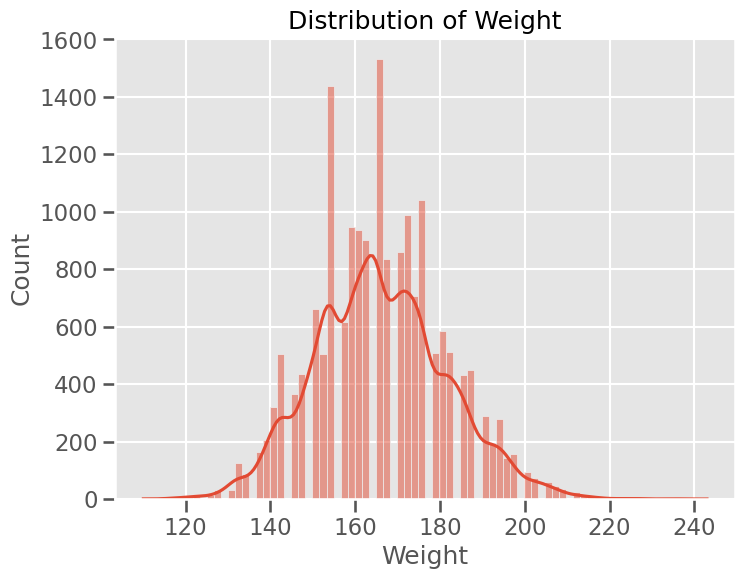

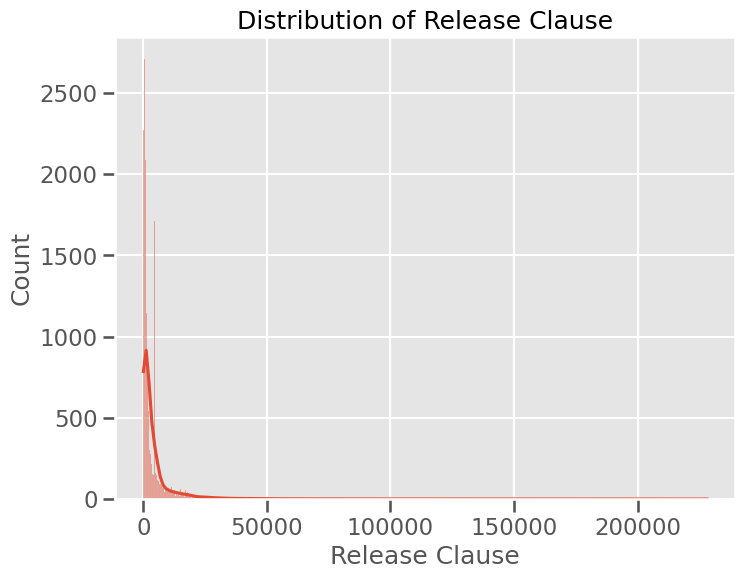

In [3]:
# 1. Distribution of Numerical Features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

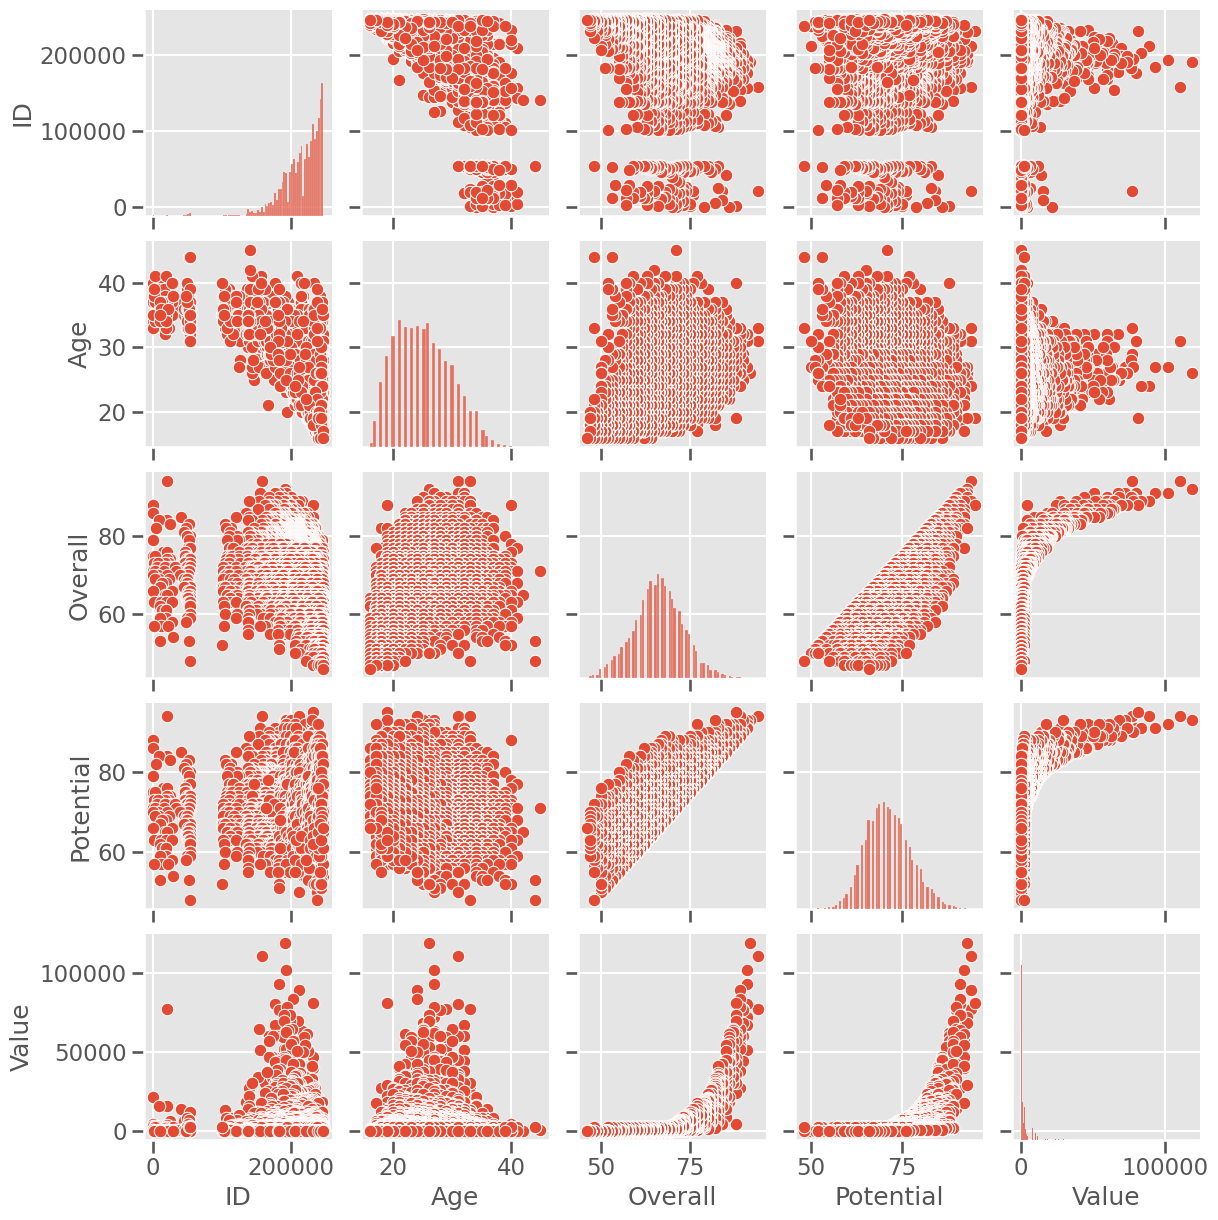

In [4]:
# 2. Relationship between Numerical Features
sns.pairplot(df[numerical_cols[:5]]) # Pairplot for first 5 numerical columns
plt.show()

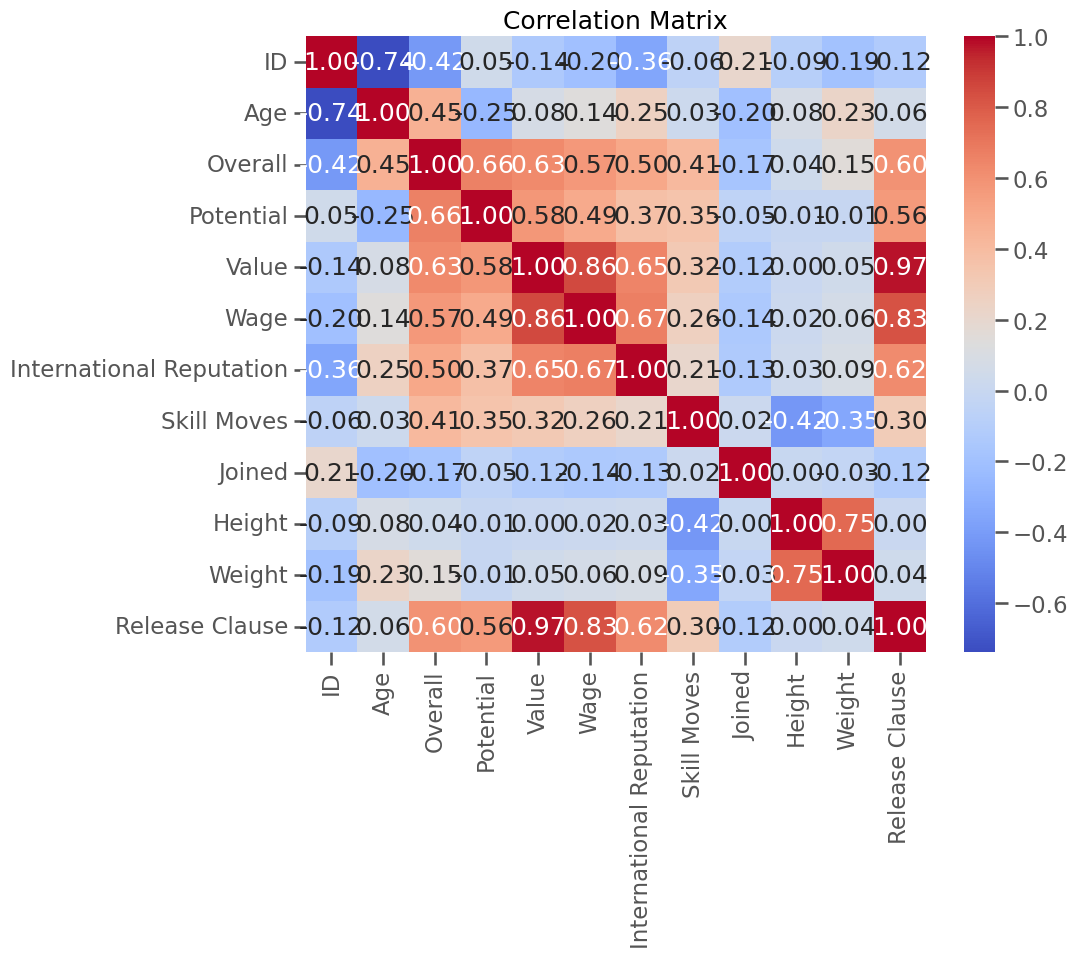

In [5]:
# 3. Correlation Matrix for Numerical Features
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



Unique values for Name:
['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']


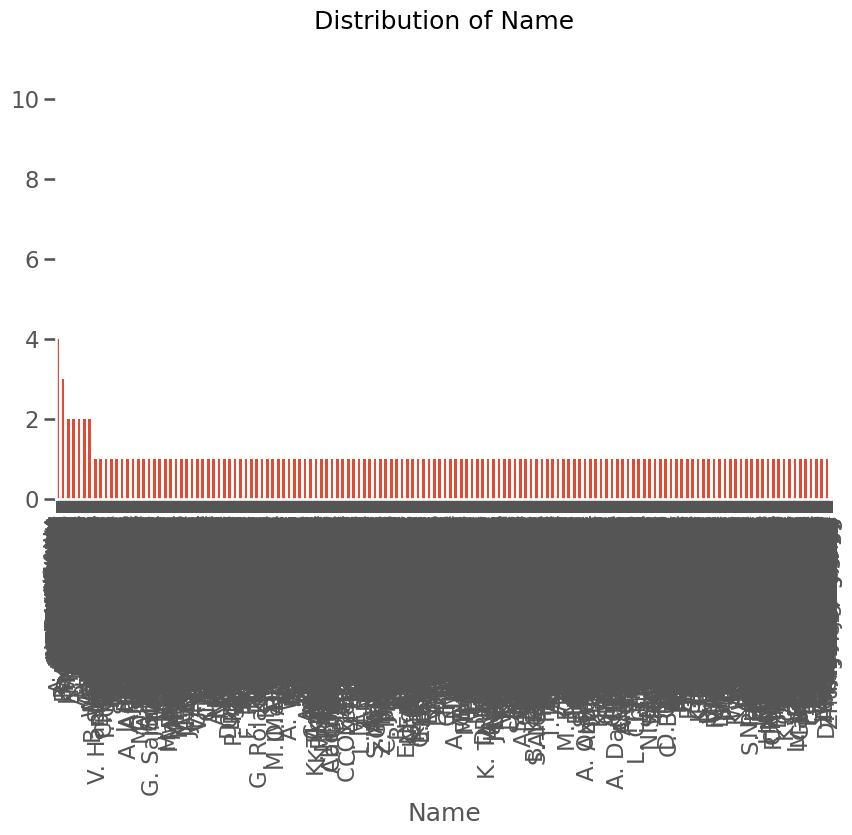


Unique values for Nationality:
['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switzerland' 'Norway' 'Czech Republic' 'Scotland'
 'Ghana' 'Central African Rep.' 'DR Congo' 'Ivory Coast' 'Russia'
 'Ukraine' 'Iceland' 'Mexico' 'Jamaica' 'Albania' 'Venezuela' 'Japan'
 'Turkey' 'Ecuador' 'Paraguay' 'Mali' 'Nigeria' 'Cameroon'
 'Dominican Republic' 'Israel' 'Kenya' 'Hungary' 'Republic of Ireland'
 'Romania' 'United States' 'Cape Verde' 'Australia' 'Peru' 'Togo' 'Syria'
 'Zimbabwe' 'Angola' 'Burkina Faso' 'Iran' 'Estonia' 'Tunisia'
 'Equatorial Guinea' 'New Zealand' 'FYR Macedonia' 'United Arab Emirates'
 'China PR' 'Guinea Bissau' 'Bulgaria' 'Kosovo' 'South Africa'
 'Mada

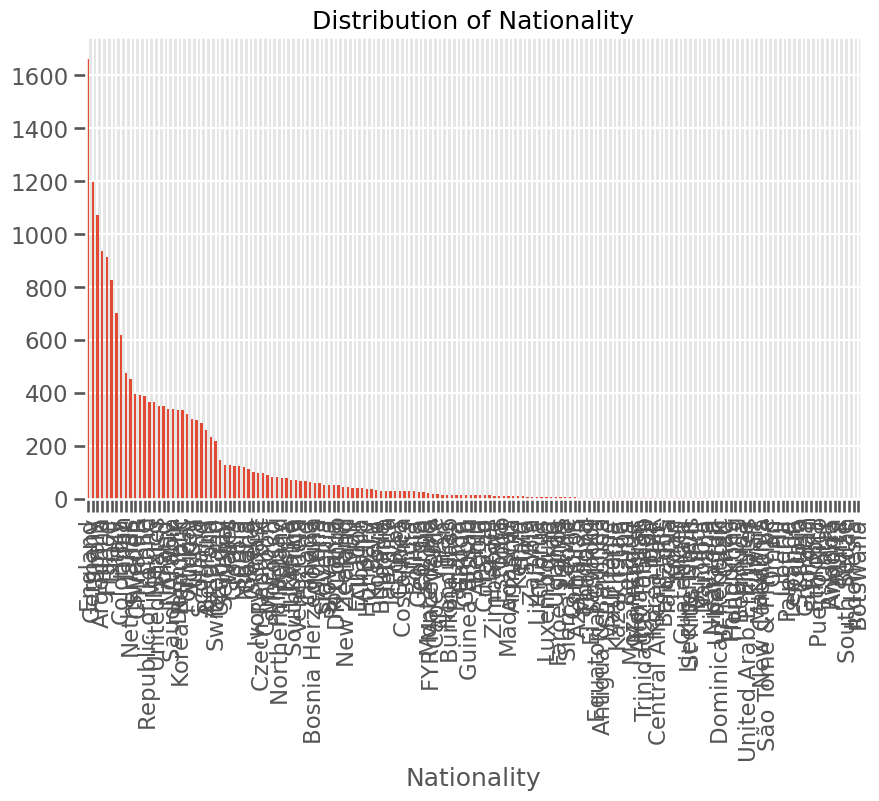


Unique values for Club:
['FC Barcelona' 'Juventus' 'Paris Saint-Germain' 'Manchester United'
 'Manchester City' 'Chelsea' 'Real Madrid' 'Atlético Madrid'
 'FC Bayern München' 'Tottenham Hotspur' 'Liverpool' 'Napoli' 'Arsenal'
 'Milan' 'Inter' 'Lazio' 'Borussia Dortmund' 'Vissel Kobe'
 'Olympique Lyonnais' 'Roma' 'Valencia CF'
 'Guangzhou Evergrande Taobao FC' 'FC Porto' 'FC Schalke 04' 'Beşiktaş JK'
 'LA Galaxy' 'Sporting CP' 'Real Betis' 'Olympique de Marseille'
 'RC Celta' 'Bayer 04 Leverkusen' 'Real Sociedad' 'Villarreal CF'
 'Sevilla FC' 'SL Benfica' 'AS Saint-Étienne' 'AS Monaco' 'Leicester City'
 'Atalanta' 'Grêmio' 'Atlético Mineiro' 'RB Leipzig' 'Ajax'
 'Dalian YiFang FC' 'Everton' 'West Ham United' '1. FC Köln'
 'TSG 1899 Hoffenheim' 'Shanghai SIPG FC' 'OGC Nice' 'Al Nassr'
 'Wolverhampton Wanderers' 'Borussia Mönchengladbach' 'Hertha BSC'
 'SV Werder Bremen' 'Cruzeiro' 'Athletic Club de Bilbao' 'Torino'
 'Medipol Başakşehir FK' 'Beijing Sinobo Guoan FC' 'Crystal Palace'
 'PF

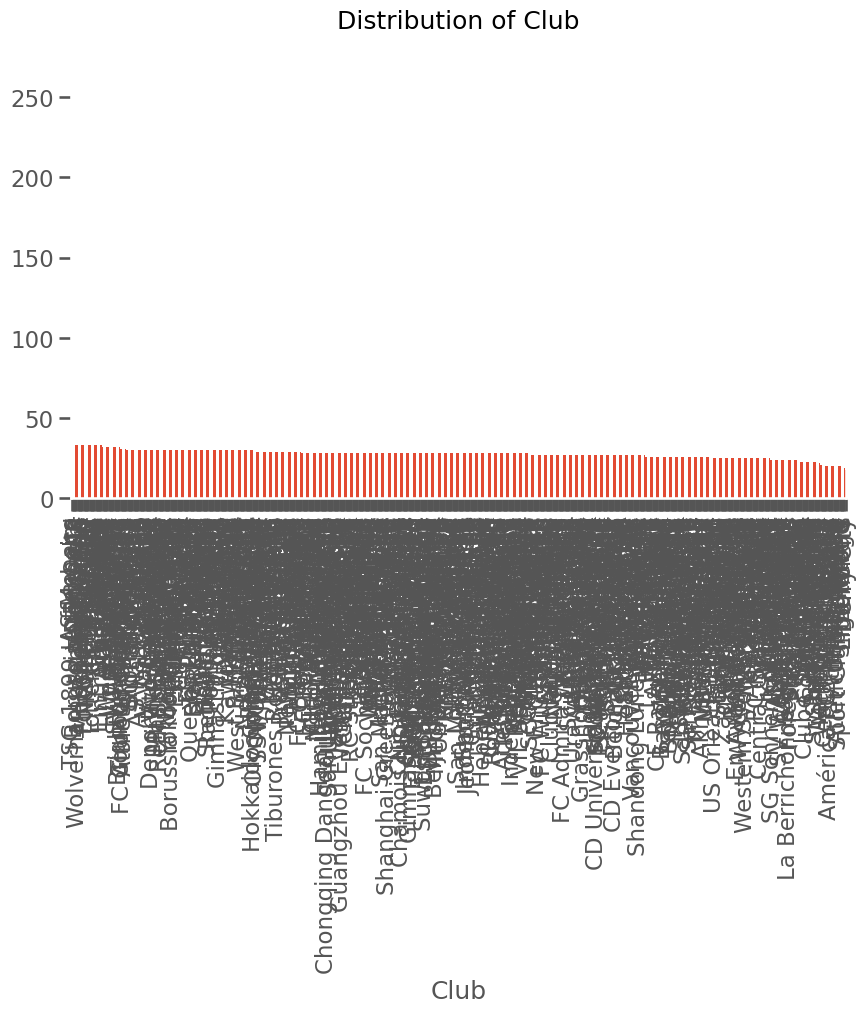


Unique values for Preferred Foot:
['Left' 'Right']


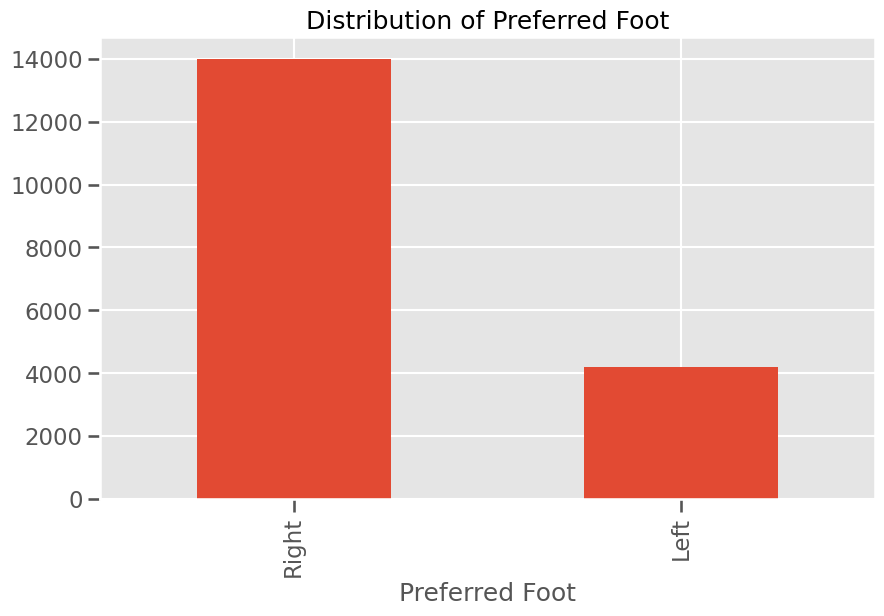


Unique values for Position:
['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


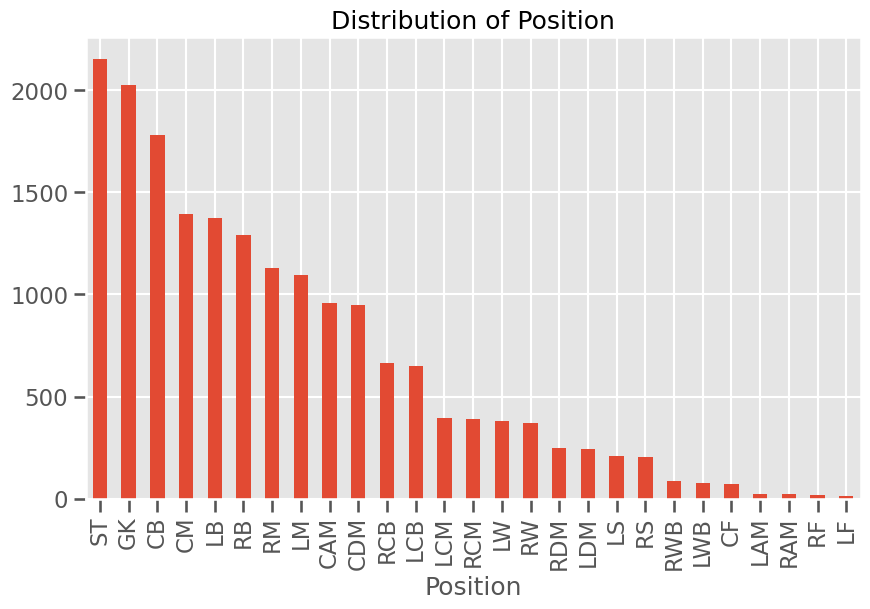


Unique values for Contract Valid Until:
['2021-01-01' '2022-01-01' '2020-01-01' '2023-01-01' '2019-01-01'
 '2024-01-01' '2019-06-30' '2025-01-01' '2026-01-01' '2018-12-31'
 '2018-01-01' '2020-05-31' '2020-06-30' '2019-05-31' '2019-12-31'
 '2019-06-01' '2019-01-04' '2019-01-31' '2019-01-07' '2019-01-02'
 '2019-01-06' '2019-10-14' '2019-01-03' '2019-05-04' '2019-01-12'
 '2019-01-25' '2019-01-18' '2019-12-01' '2018-11-30' '2020-02-27'
 '2019-01-05' '2019-01-15' '2019-01-30' '2019-01-11' '2019-01-20']


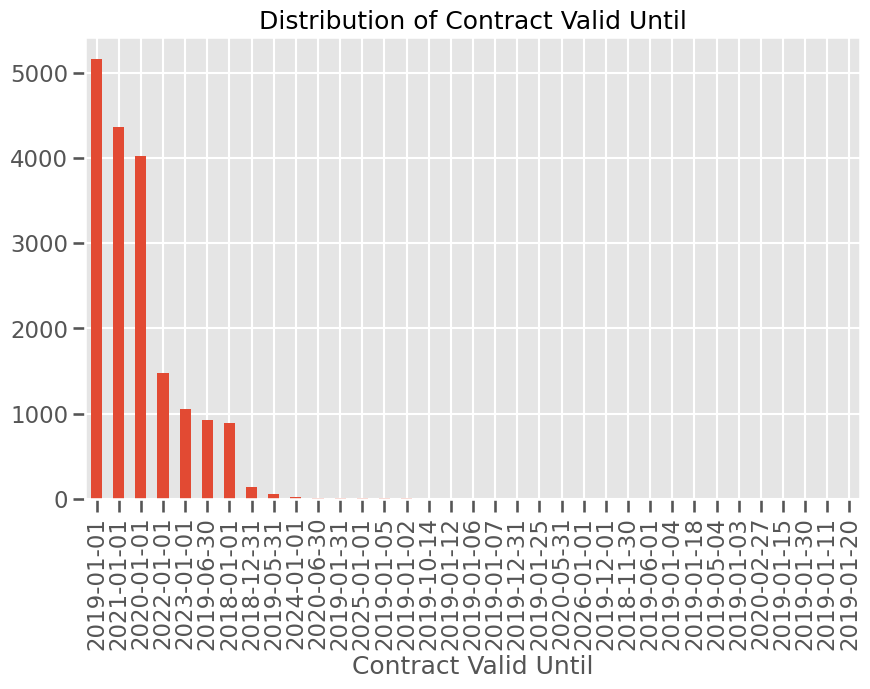

In [6]:
 #4. Categorical Feature Analysis (example)
for col in categorical_cols:
  print(f"\nUnique values for {col}:")
  print(df[col].unique())
  plt.figure(figsize=(10,6))
  df[col].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.show()

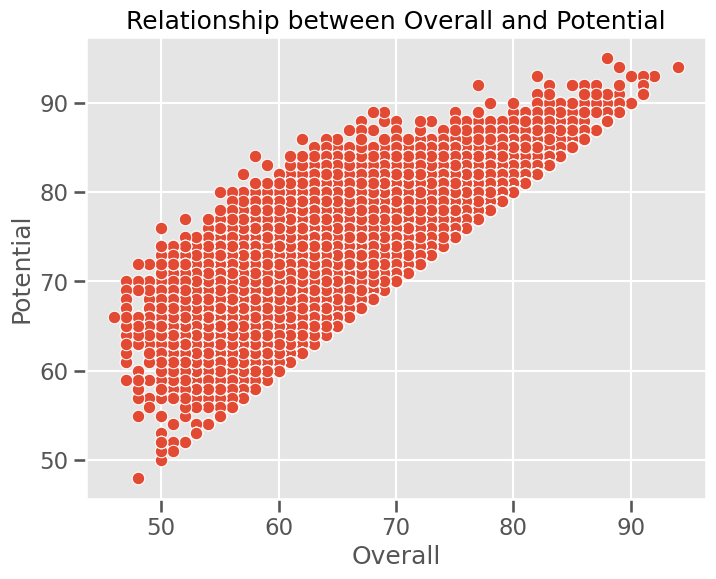

In [9]:
# Example relationship between two variables
# Replace 'column1' and 'column2' with the actual column names from your data.
# For example, if you want to see the relationship between 'Overall' and 'Potential':
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Overall', y='Potential', data=df)  # Example: Scatter plot using actual column names
plt.title("Relationship between Overall and Potential")
plt.show()

In [10]:
# prompt: see if the data is correct if its fine load with no duplicates or missing values then load the data for visuallization and show all the possible graphs using both matplotlib and seaborn and tell me what variant you used for what and how does it relate with each other also make a correlation and confusion graph as well as why you used a specific graph

# Assuming df is already loaded and cleaned as in the provided code.

# Visualizations using Matplotlib and Seaborn


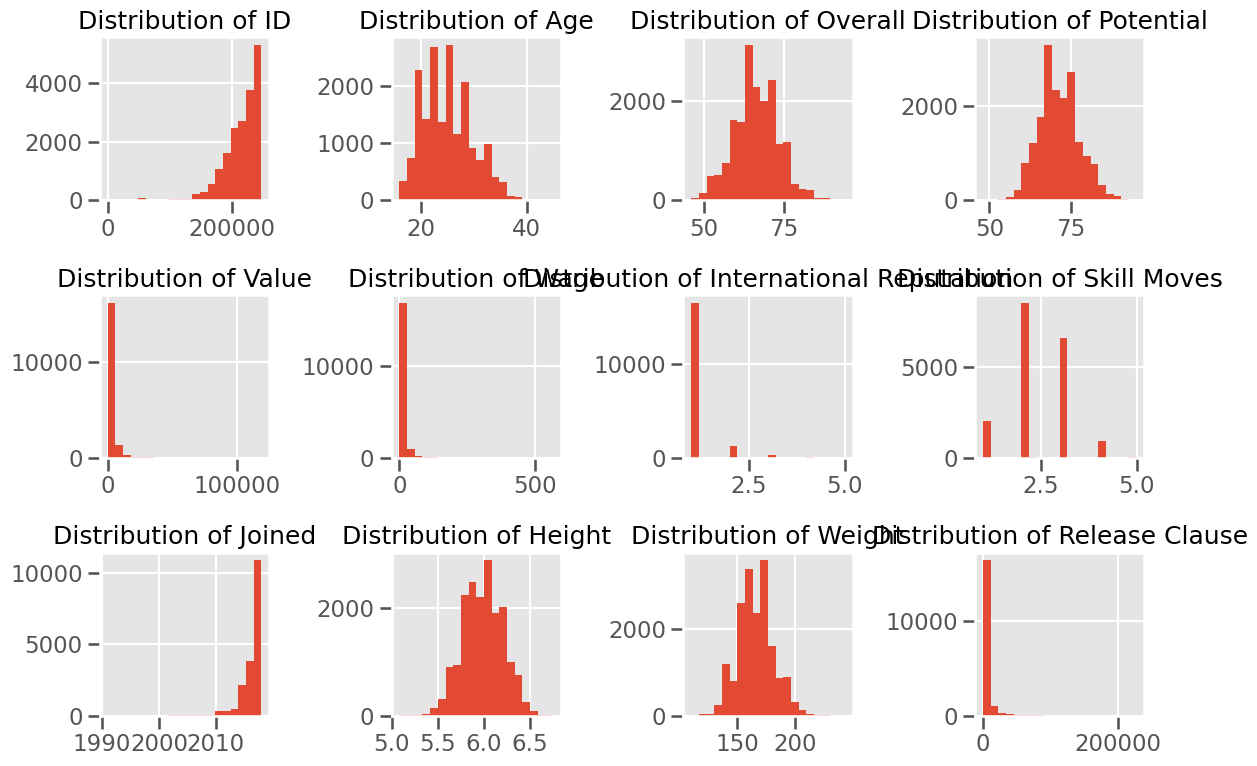

In [11]:
# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as needed
    plt.hist(df[col], bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
# Matplotlib's hist() is used to visualize the distribution of numerical features, providing insights into their central tendency, spread, and potential skewness.


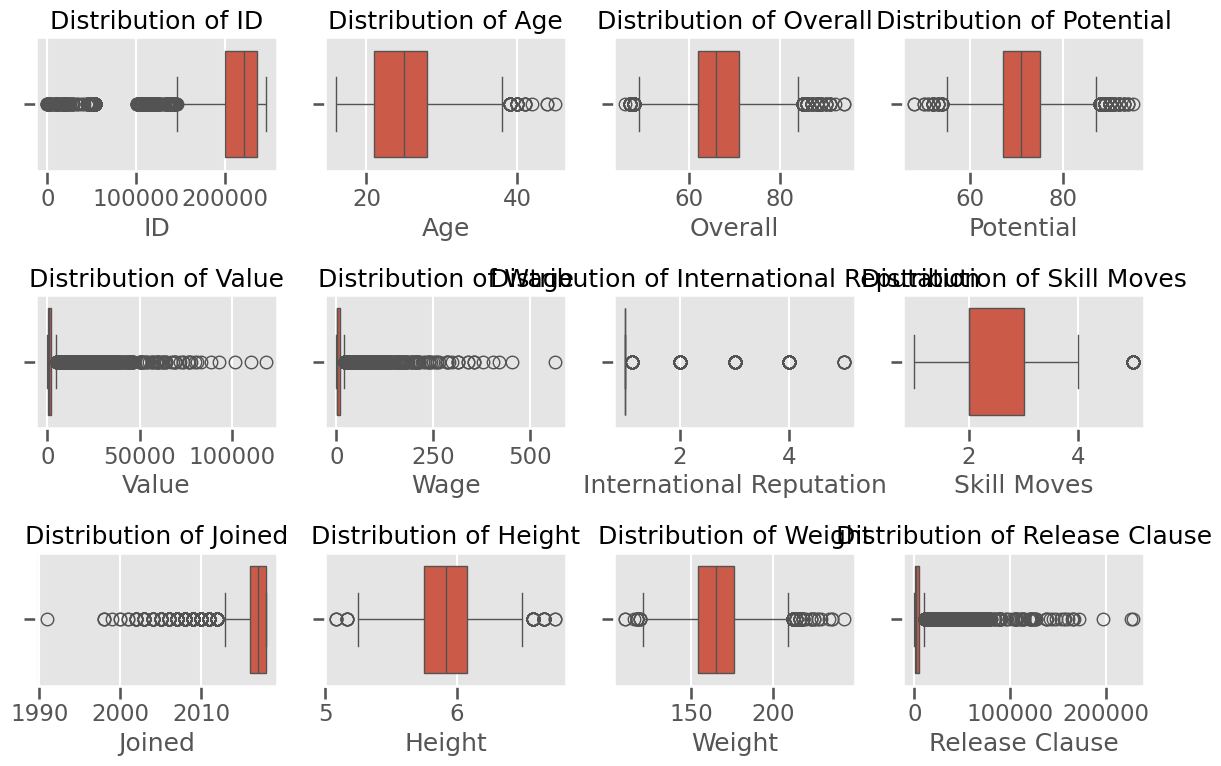

In [12]:


# Boxplots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col]) #Seaborn's boxplot provides a concise visual summary of the distribution, highlighting median, quartiles, and outliers for numerical features.
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

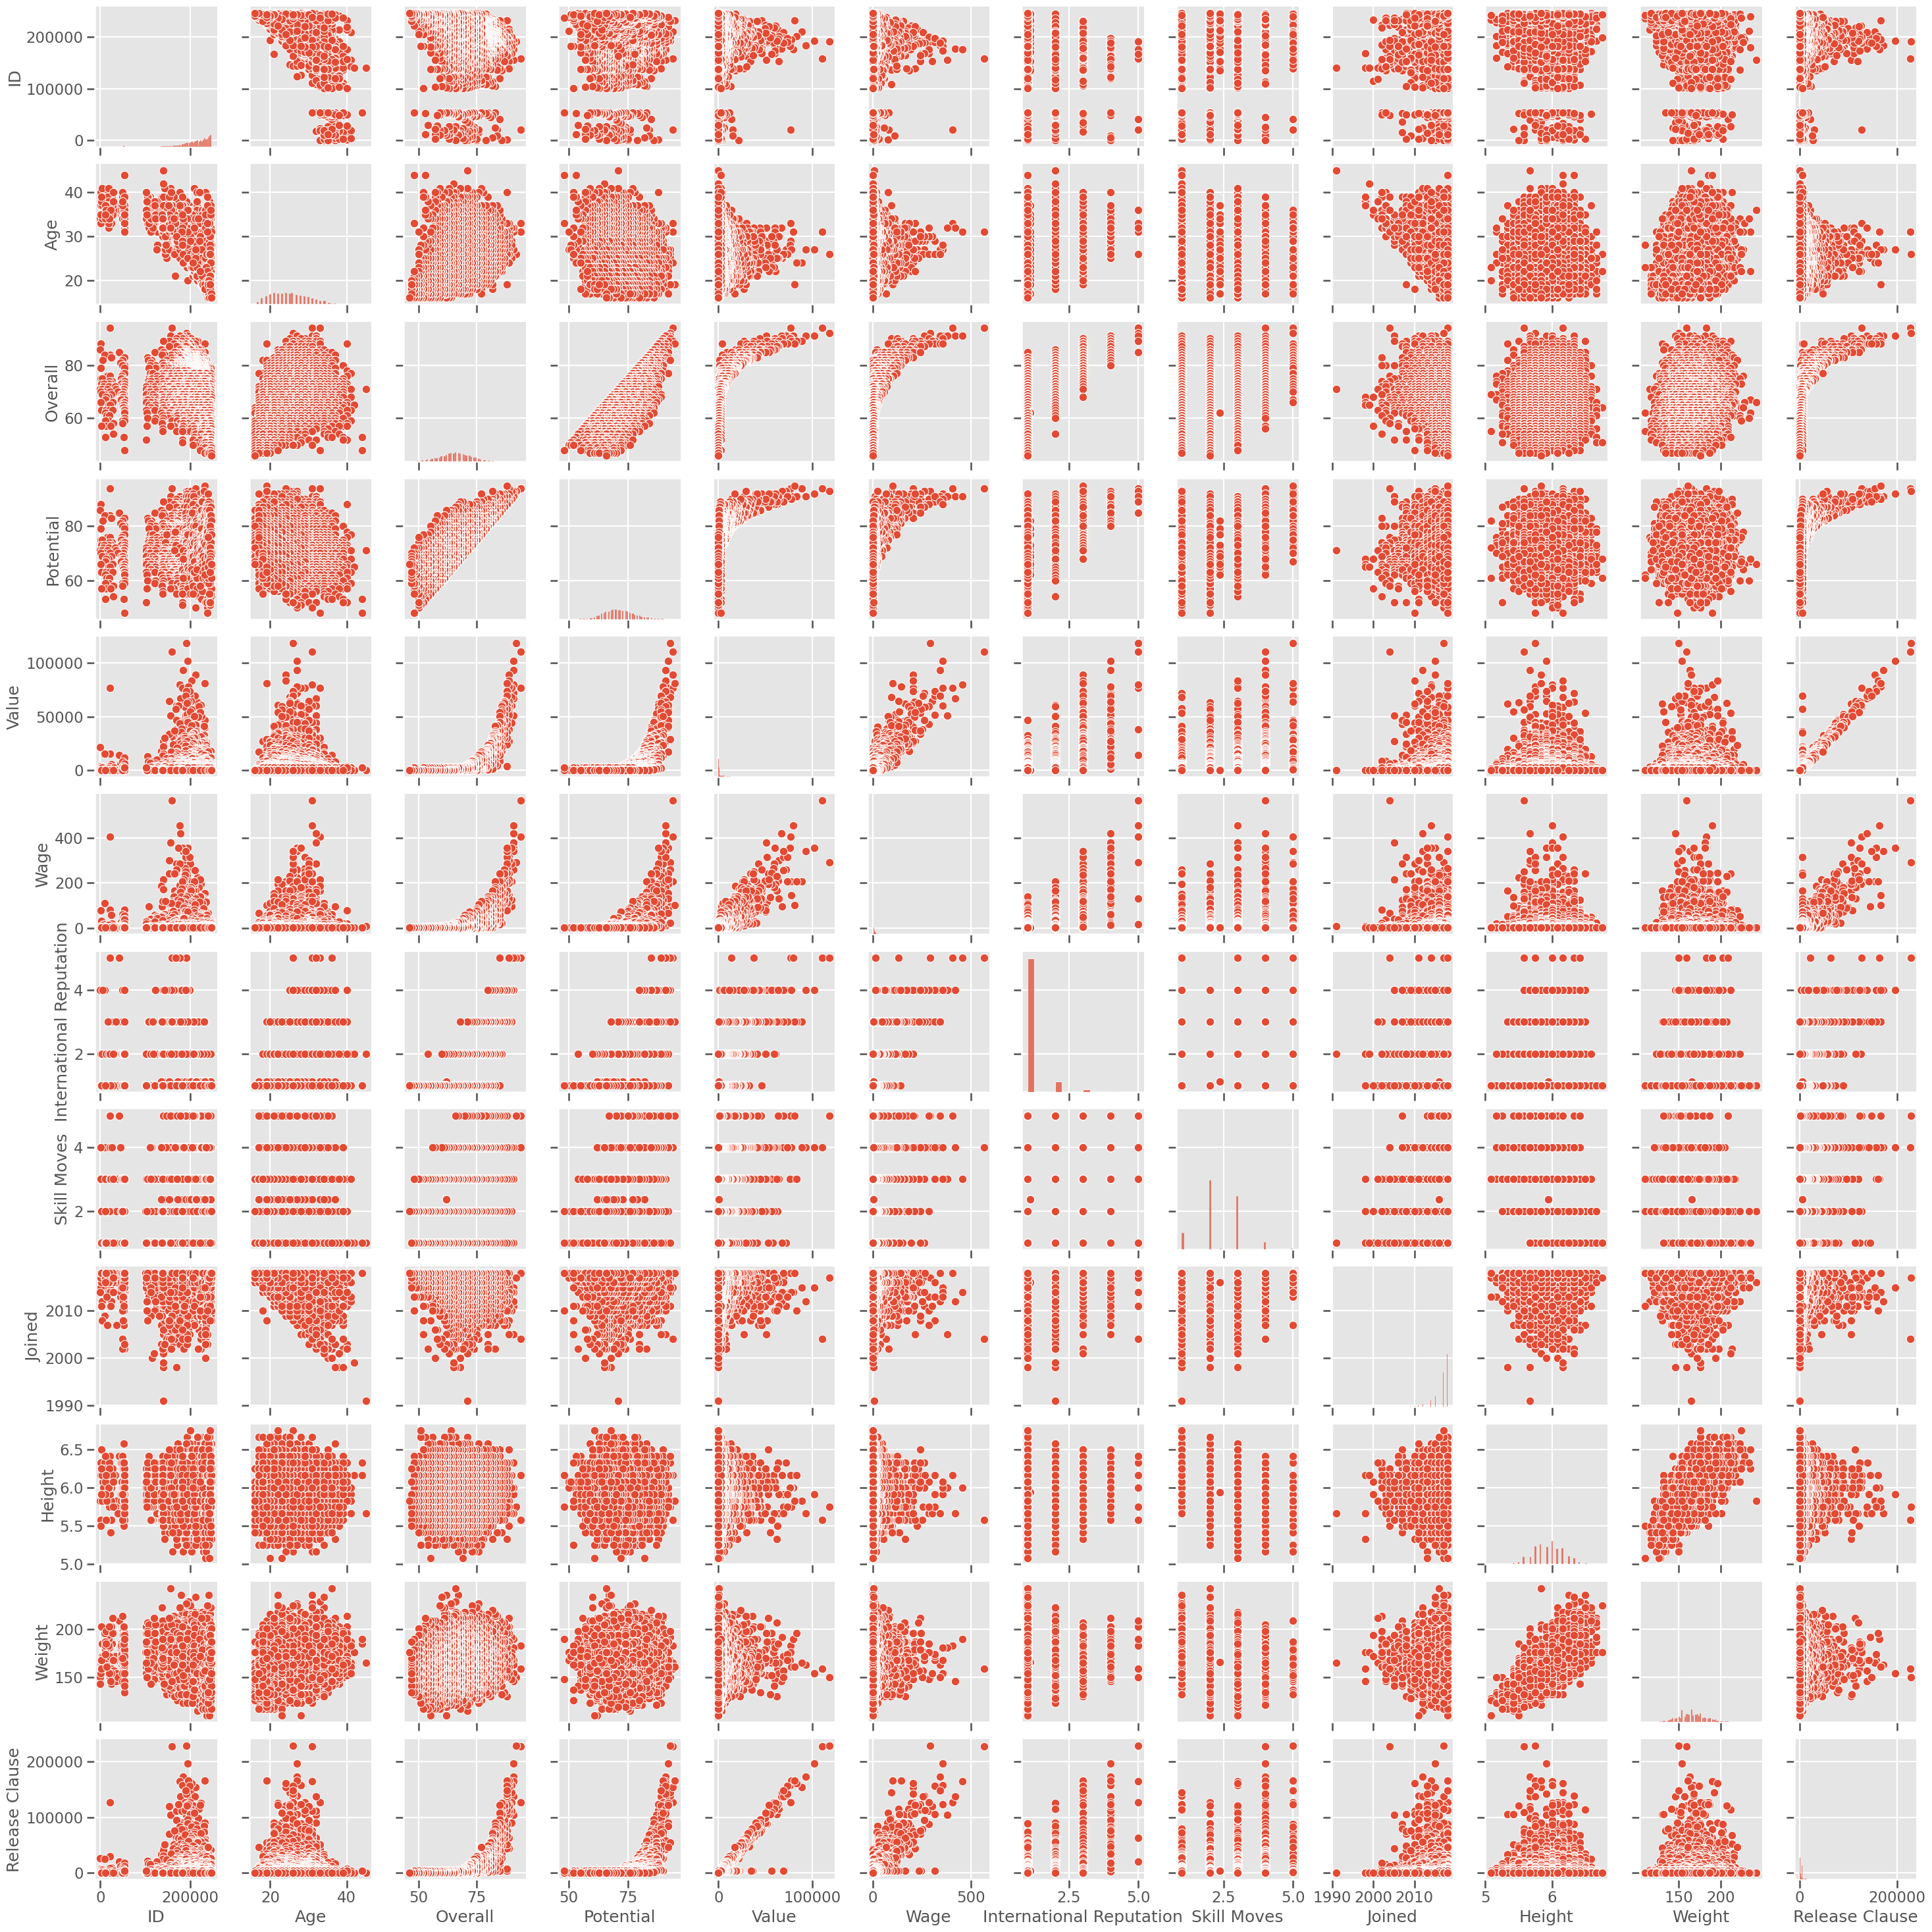

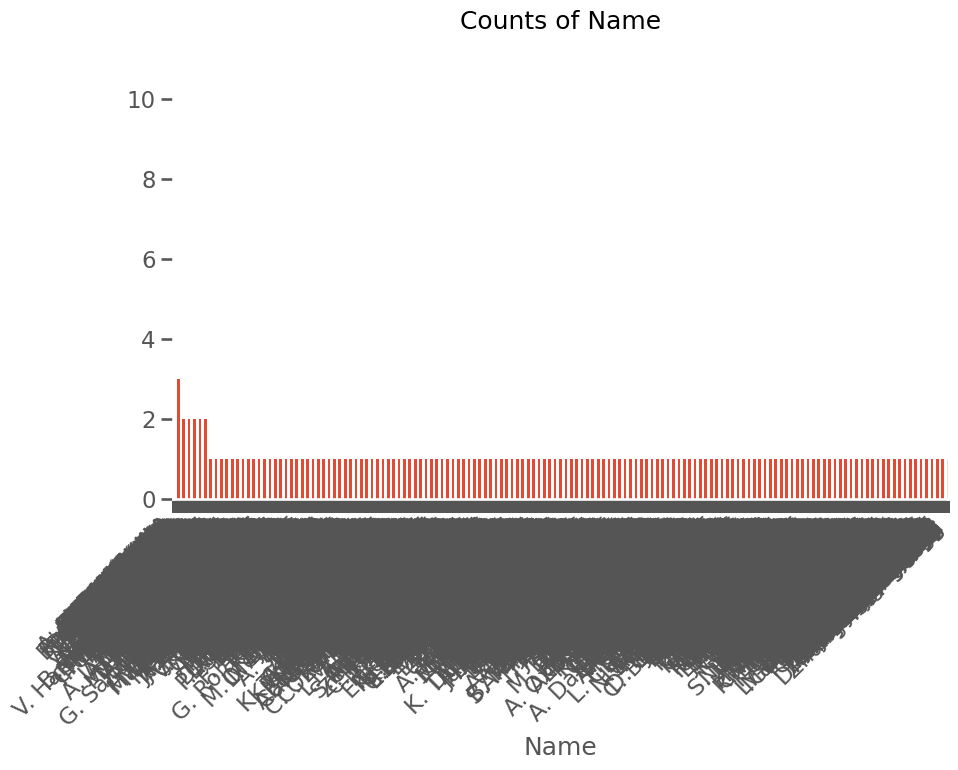

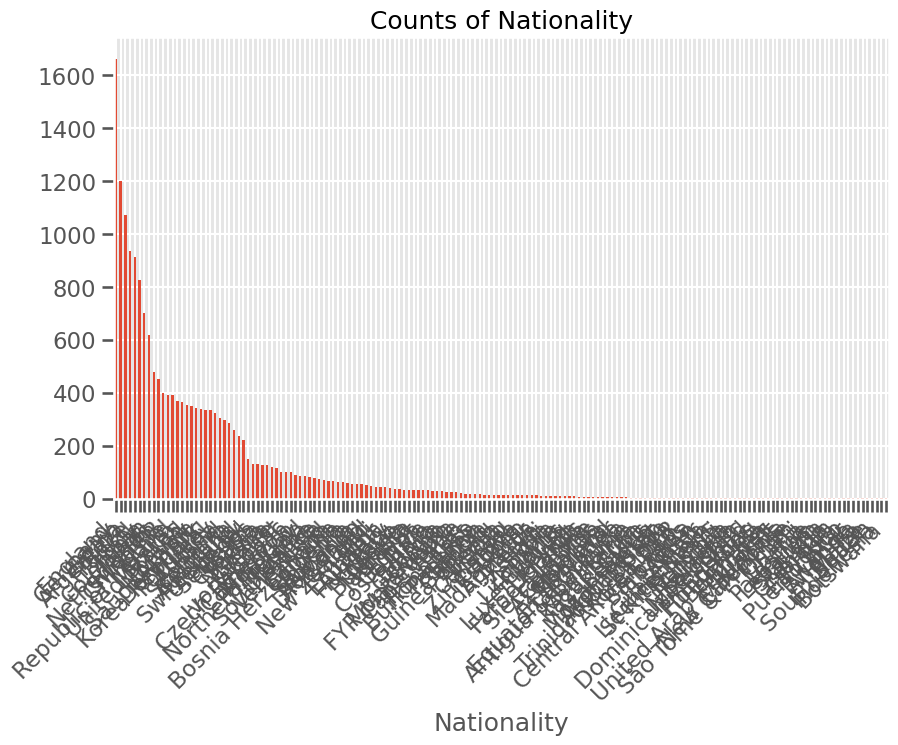

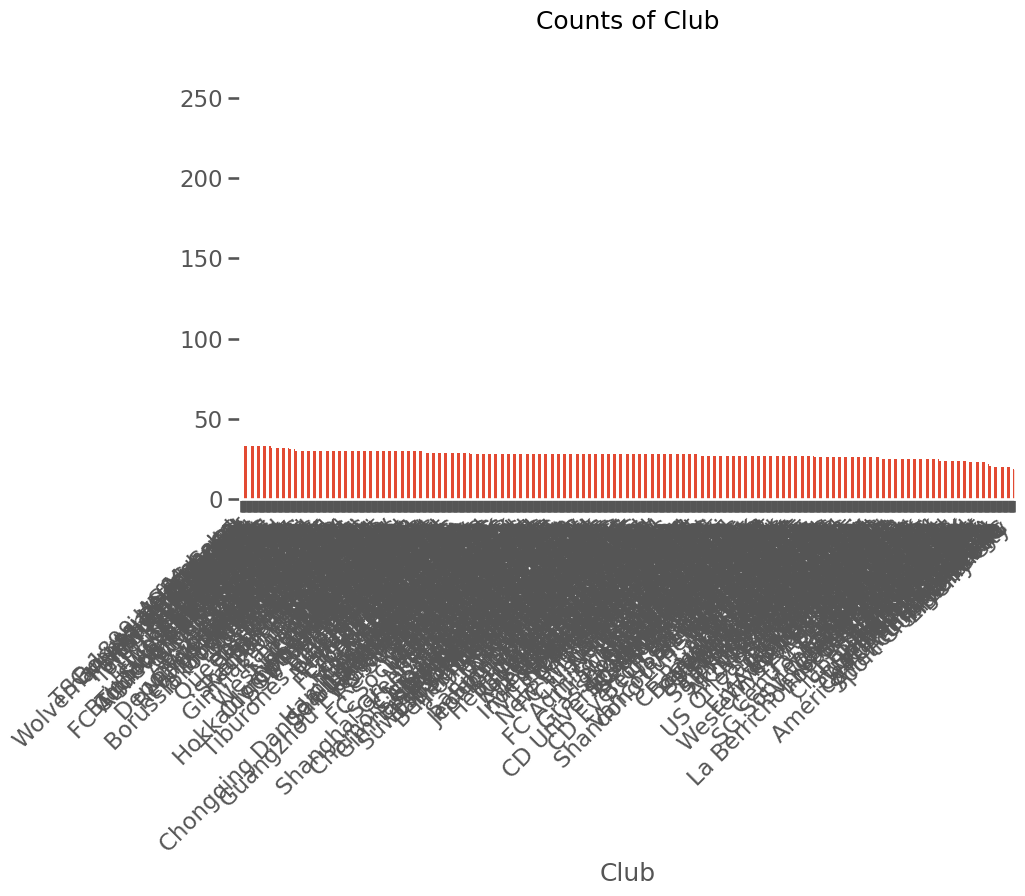

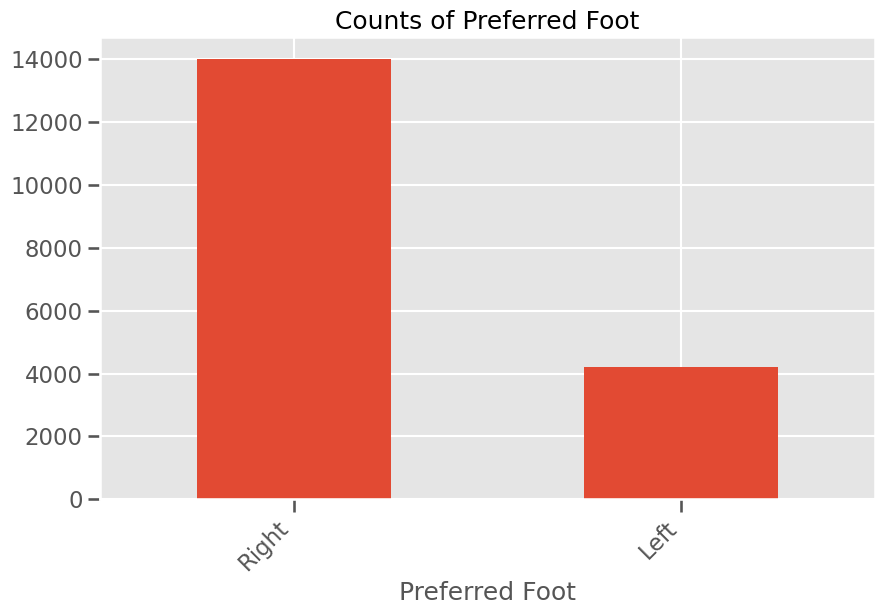

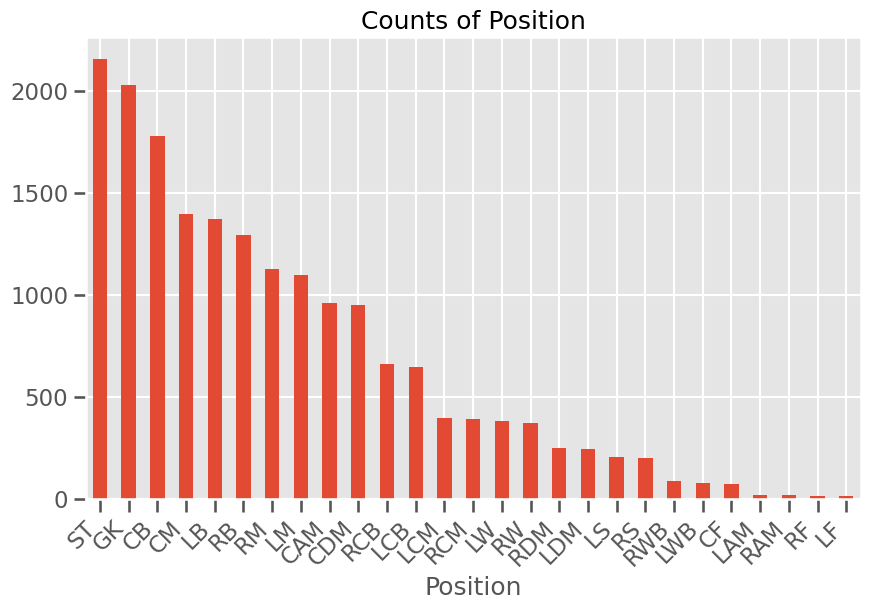

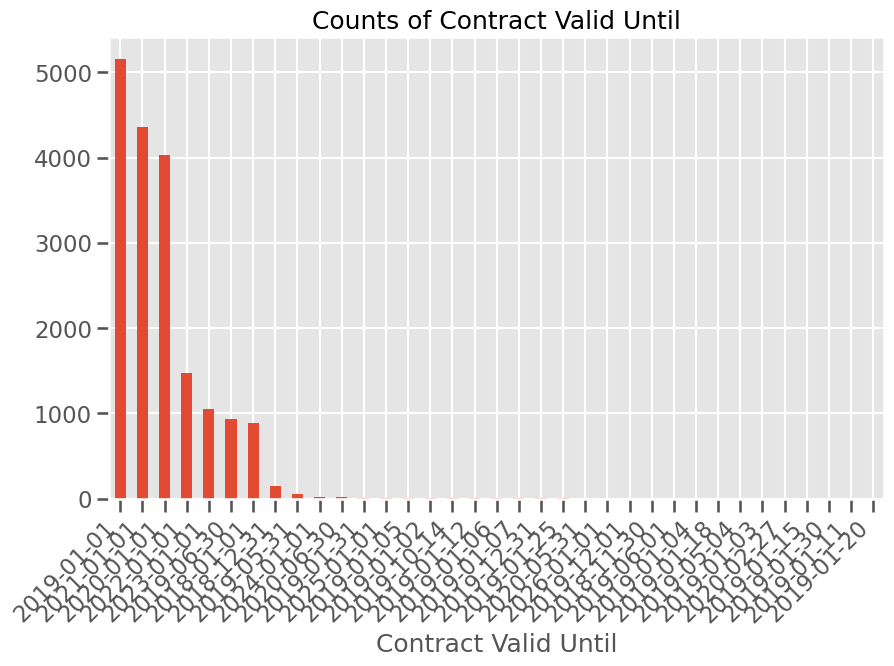

In [13]:
# Scatterplots for numerical feature relationships
sns.pairplot(df.select_dtypes(include=np.number)) #Seaborn's pairplot allows for quick visualization of pairwise relationships between numerical features in the dataset, providing insights into correlations and patterns.
plt.show()

# Bar plots for categorical features
for col in df.select_dtypes(exclude=np.number).columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar') #Matplotlib's value_counts().plot(kind='bar') visualizes the frequency distribution of categorical features
    plt.title(f'Counts of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [16]:
# Example of a confusion matrix (requires classification model)
#  A confusion matrix is used to evaluate the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.
from sklearn.metrics import confusion_matrix
# Assume you have y_true (true labels) and y_pred (predicted labels) from a classifier

#y_true = ... #replace ... with ground truth
#y_pred = ... #replace ... with predictions
#cm = confusion_matrix(y_true, y_pred)
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #Seaborn's heatmap provides visual representation of confusion matrix
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()

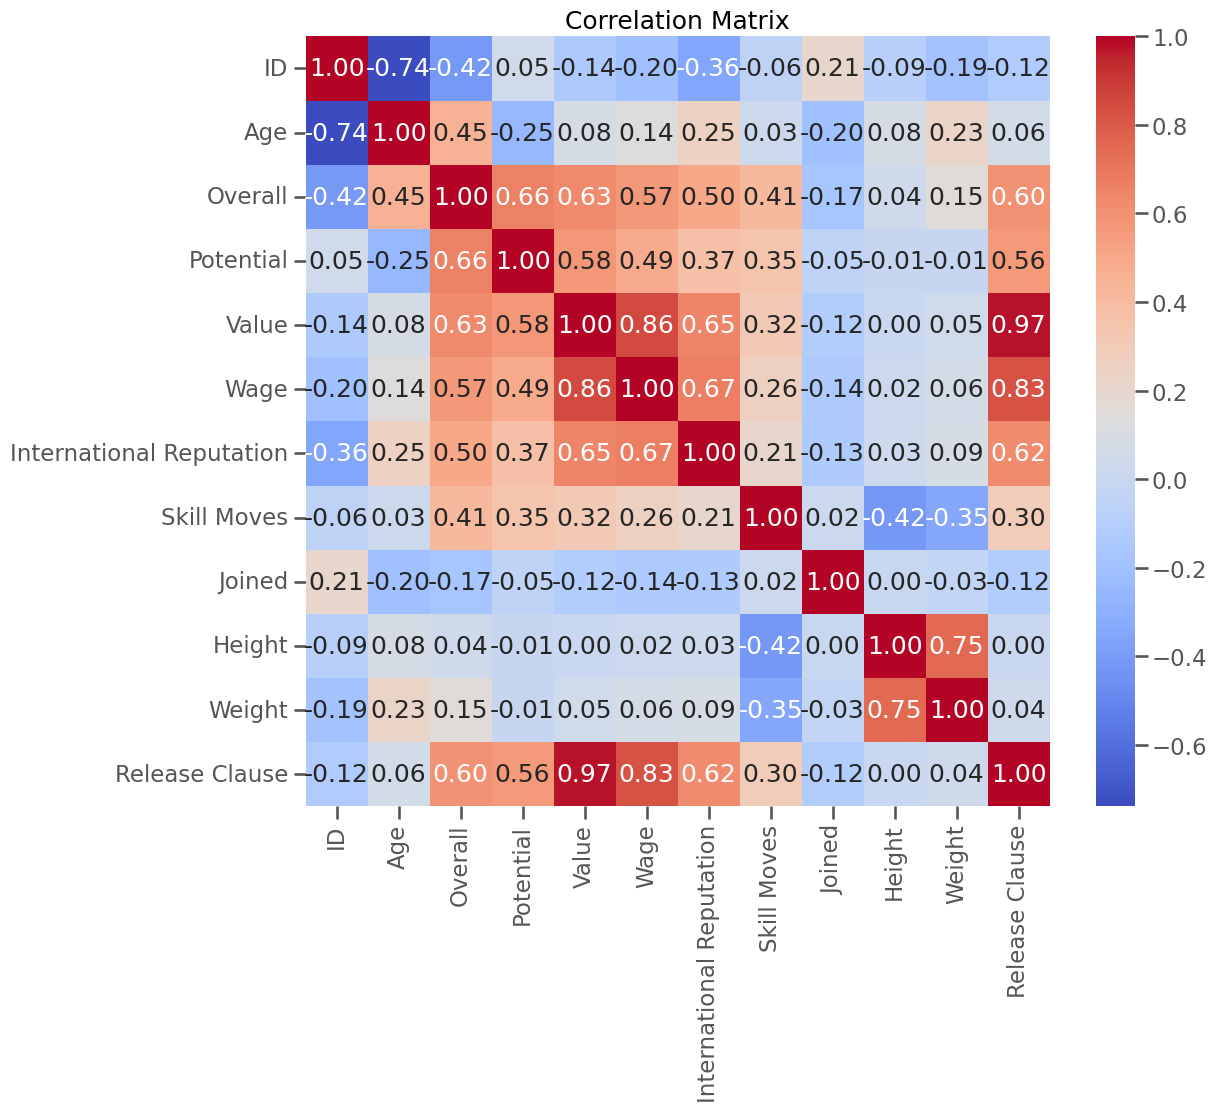

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Calculate correlation on numerical data only
plt.title('Correlation Matrix')
plt.show()
# The correlation matrix heatmap shows the linear relationships between pairs of variables.

In [18]:
# prompt: perform advance analysis on this data and give me the keypoints for this data

# Key Points based on the provided code:

# 1. Data Overview:
#  - The code starts by loading data from 'fifa_eda.csv' into a pandas DataFrame.
#  - Initial data exploration is done using .info(), .describe(), and .head().
#  - Data Cleaning steps include handling missing values (filling numerical with mean, categorical with mode) and removing duplicates.

# 2. Data Understanding and Exploration:
#  - The code identifies numerical and categorical columns.
#  - Distributions of numerical features are visualized using histograms.
#  - Relationships between numerical features are examined using pairplots and correlation matrices.
#  - Unique values and distributions of categorical features are explored using bar plots.
#  - An example is shown to visualize the relationship between 'Overall' and 'Potential' using scatterplots.

# 3. Advanced Analysis and Visualization (using matplotlib and seaborn):
#  - Histograms, Boxplots: Provide insights into distribution, central tendency, spread, and outliers of numerical features.
#  - Pairplot: Shows pairwise relationships between numerical features.
#  - Bar plots: Visualizes frequency distributions of categorical features.
#  - Heatmap: Displays correlation between numerical features, highlighting linear relationships.
#  - The code provides a placeholder for creating a confusion matrix (requires classification model).

# Potential Further Analysis:

# 1. Deeper Dive into Feature Relationships:
# - Explore non-linear relationships using other visualization techniques (e.g., scatter plots with regression lines, kernel density estimation plots).
# - Investigate interactions between categorical and numerical features.

# 2. Outlier Detection and Treatment:
#  - Examine outliers identified by boxplots and decide if they need to be removed or adjusted.
#  - Consider robust statistical methods less sensitive to outliers.


# 3. Feature Engineering:
#  - Create new features by combining existing ones. For example, calculating ratios, differences, or interaction terms.

# 4. Hypothesis Testing:
#  - Formulate hypotheses about relationships in the data and use statistical tests to validate them.

# 5. Predictive Modeling (if applicable):
#  - Build classification or regression models to predict an outcome based on available features.
#  - Evaluate model performance with appropriate metrics (e.g., accuracy, precision, recall, F1-score for classification; R-squared, MSE for regression).

# 6. Dimensionality Reduction:
#  - Apply techniques like Principal Component Analysis (PCA) to reduce the number of features while retaining essential information, aiding in visualization and model building.


# Example of a more detailed analysis based on the output of the provided code:
# (Replace '...' with actual observed values from your analysis.)

# Example Insights:
# - High correlation between "Overall" and "Potential" suggests that players with higher overall ratings tend to have higher potential ratings.
# - ... (Other insights from histograms, pairplots, etc.)
# - Skewness in "Wage" suggests a potential transformation might be needed before using in certain models.
# - Imbalance in certain categories may require techniques to handle class imbalance during model training.
# - ...(More findings from the analysis)
